In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
group_2 = [
    'vk_2_eg', 'stahl_folder', 'r707lv_f4032', 
    'r707lv_f4034', 'r707lv_vari_air', 'r707lv_trockner', 'og_3'
]

### Kernel Composition

Trockner exhibits periodic patterns, and when these cycles occur, the power consumption has a large variation that fluctuates very quickly
 - This tells us that on top of a periodic kernel, their is short, but large varying fluctuations

In [2]:
## Locally Periodic Kernel ##

period_constraint_short = gpytorch.constraints.Interval(0.045, 0.055) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short_lengthscale_prior = gpytorch.priors.GammaPrior(1, 0.5)
seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        #lengthscale_prior=seasonal_rbf_short_lengthscale_prior
    )
)

#seasonal_rbf_short.base_kernel.lengthscale = seasonal_rbf_short_lengthscale_prior.mean

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.065, 0.073) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)
#local_variation_lengthscale = gpytorch.priors.GammaPrior(1, 0.05)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha.mean
#local_variation.lengthscale = local_variation_lengthscale

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
    )
)


#covar_module = locally_short_periodic + locally_long_periodic + local_variation # + local_variation_2
covar_module =  locally_long_periodic + local_variation + local_variation_2

In [19]:
## Locally Periodic Kernel ##
"""
period_constraint_short = gpytorch.constraints.Interval(0.08, 0.105) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short_lengthscale_prior = gpytorch.priors.GammaPrior(1, 0.5)
seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        #lengthscale_prior=seasonal_rbf_short_lengthscale_prior
    )
)

#seasonal_rbf_short.base_kernel.lengthscale = seasonal_rbf_short_lengthscale_prior.mean

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short
"""

# Longer term periodic
period_constraint_long = gpytorch.constraints.Interval(0.09, 0.11) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

mat_lengthscale = gpytorch.constraints.Interval(0.5, 1.0)
seasonal_matern_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.MaternKernel(
        nu=3/2,
        lengthscale_constraint=mat_lengthscale
        
    )
)

locally_long_periodic = seasonal_periodic_long * seasonal_matern_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)
#local_variation_lengthscale = gpytorch.priors.GammaPrior(1, 0.05)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha.mean
#local_variation.lengthscale = local_variation_lengthscale

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
    )
)


#covar_module = locally_short_periodic + locally_long_periodic + local_variation # + local_variation_2
covar_module =  locally_long_periodic + local_variation + local_variation_2

In [20]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('r707lv_trockner_30T', 30, True)

Iter 1 , Loss = 1.3601660710419337 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.3527793256526914 , Noise = 0.7444966435432434
Iter 3 , Loss = 1.3481537593683572 , Noise = 0.7915483713150024
Iter 4 , Loss = 1.3448977535303637 , Noise = 0.8234408497810364
Iter 5 , Loss = 1.341597413898711 , Noise = 0.8345630764961243
Iter 6 , Loss = 1.3379138986612287 , Noise = 0.8291329741477966
Iter 7 , Loss = 1.3341364474644652 , Noise = 0.813254714012146
Iter 8 , Loss = 1.3306112320668306 , Noise = 0.791760265827179
Iter 9 , Loss = 1.327530933931927 , Noise = 0.7684839963912964
Iter 10 , Loss = 1.3248551469421088 , Noise = 0.746787428855896
Iter 11 , Loss = 1.3222966481909861 , Noise = 0.7295113801956177
Iter 12 , Loss = 1.3193218460104046 , Noise = 0.7183200716972351
Iter 13 , Loss = 1.3152759872408177 , Noise = 0.7131087183952332
Iter 14 , Loss = 1.309643199007186 , Noise = 0.7121127843856812
Iter 15 , Loss = 1.301965443955211 , Noise = 0.7123384475708008
Iter 16 , Loss = 1.2916475422474682 , Noi

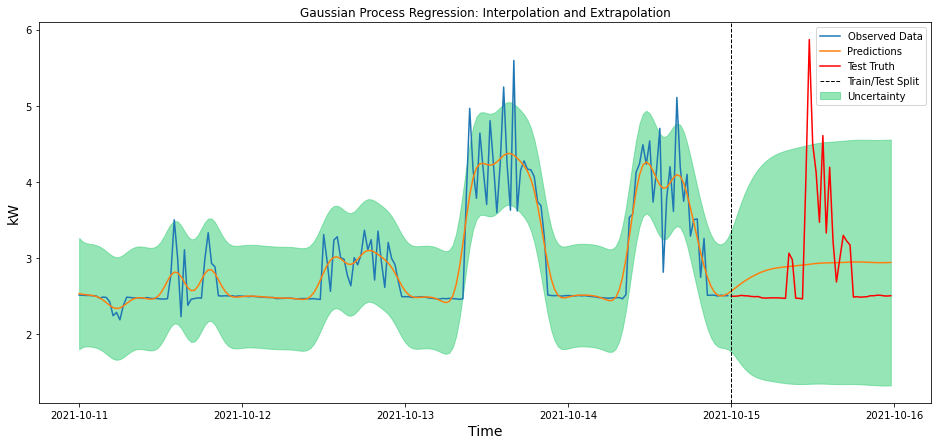

Paper Disposal Machine (Entsorgung)
-----------------------------------
Expected next day energy consumption    =  tensor(68.9369, dtype=torch.float64) kWh
Upper bound next day energy consumption =  tensor(104.5354, dtype=torch.float64) kWh
Lower bound next day energy consumption =  tensor(33.3384, dtype=torch.float64) kWh


In [21]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30',
    machine='r707lv_trockner_30T',
    update_score=False
)   

In [22]:
mse, mape

(0.4930865771713717, 0.15619991034639943)

In [6]:
perf_dev_upper

{Timestamp('2021-10-11 14:15:00'): 3.936132581011651,
 Timestamp('2021-10-11 14:45:00'): 4.354181811023406,
 Timestamp('2021-10-11 19:00:00'): 4.172669365372744,
 Timestamp('2021-10-12 12:00:00'): 4.334649947374932,
 Timestamp('2021-10-13 09:15:00'): 5.163852103566798,
 Timestamp('2021-10-13 09:30:00'): 5.44994882836445,
 Timestamp('2021-10-13 13:15:00'): 6.064823570137102,
 Timestamp('2021-10-13 14:00:00'): 5.903140511627185,
 Timestamp('2021-10-13 14:30:00'): 5.872282706293942,
 Timestamp('2021-10-13 15:15:00'): 6.177645227196723,
 Timestamp('2021-10-13 16:15:00'): 5.9754530817779665,
 Timestamp('2021-10-14 11:30:00'): 5.631011689445983,
 Timestamp('2021-10-14 13:00:00'): 5.393078342497122,
 Timestamp('2021-10-14 15:00:00'): 6.2632416730757345,
 Timestamp('2021-10-14 16:00:00'): 5.685672403454941,
 Timestamp('2021-10-15 11:15:00'): 5.608516855683489,
 Timestamp('2021-10-15 11:30:00'): 5.637531627500104,
 Timestamp('2021-10-15 11:45:00'): 6.099592102866482,
 Timestamp('2021-10-15 12:1

### 10T

In [9]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.083, 0.126) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.167, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation


In [10]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_30T', 30, True)

Iter 1 , Loss = 1.1167325933146015 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0860422000868042 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0578813669127018 , Noise = 0.5982540845870972
Iter 4 , Loss = 1.034519570589345 , Noise = 0.5545238852500916
Iter 5 , Loss = 1.016989282242349 , Noise = 0.5133202075958252
Iter 6 , Loss = 1.0029779132467664 , Noise = 0.4746778905391693
Iter 7 , Loss = 0.9891673703587464 , Noise = 0.4386254549026489
Iter 8 , Loss = 0.974480447016517 , Noise = 0.4051511883735657
Iter 9 , Loss = 0.9593008503451905 , Noise = 0.37420448660850525
Iter 10 , Loss = 0.9444954295627985 , Noise = 0.3457084596157074
Iter 11 , Loss = 0.9311038585661806 , Noise = 0.3195689618587494
Iter 12 , Loss = 0.9202051139326329 , Noise = 0.29568687081336975
Iter 13 , Loss = 0.9120358580878859 , Noise = 0.27397993206977844
Iter 14 , Loss = 0.9053210593234681 , Noise = 0.25439631938934326
Iter 15 , Loss = 0.8990413582122293 , Noise = 0.2368994802236557
Iter 16 , Loss = 0.89371013735091

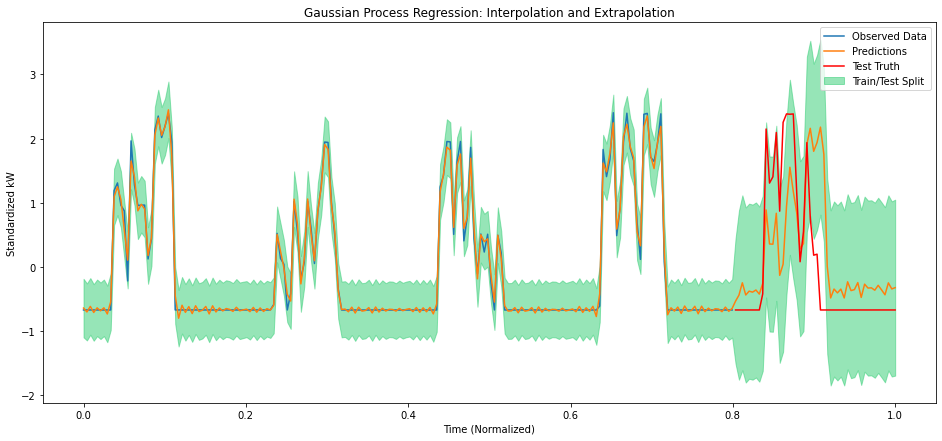

Points outside of confidence region: [2.25321257 2.38491068]


In [11]:
model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='vk_2_eg',
    update_score=False
)   

In [12]:
mse, mape

(0.8419735761654904, 1.0628913651431569)